In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV project images/3.2.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV project images/3.1.jpg')
image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV project images/3.3.jpg')
image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV project images/3.4.jpg')

In [ ]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

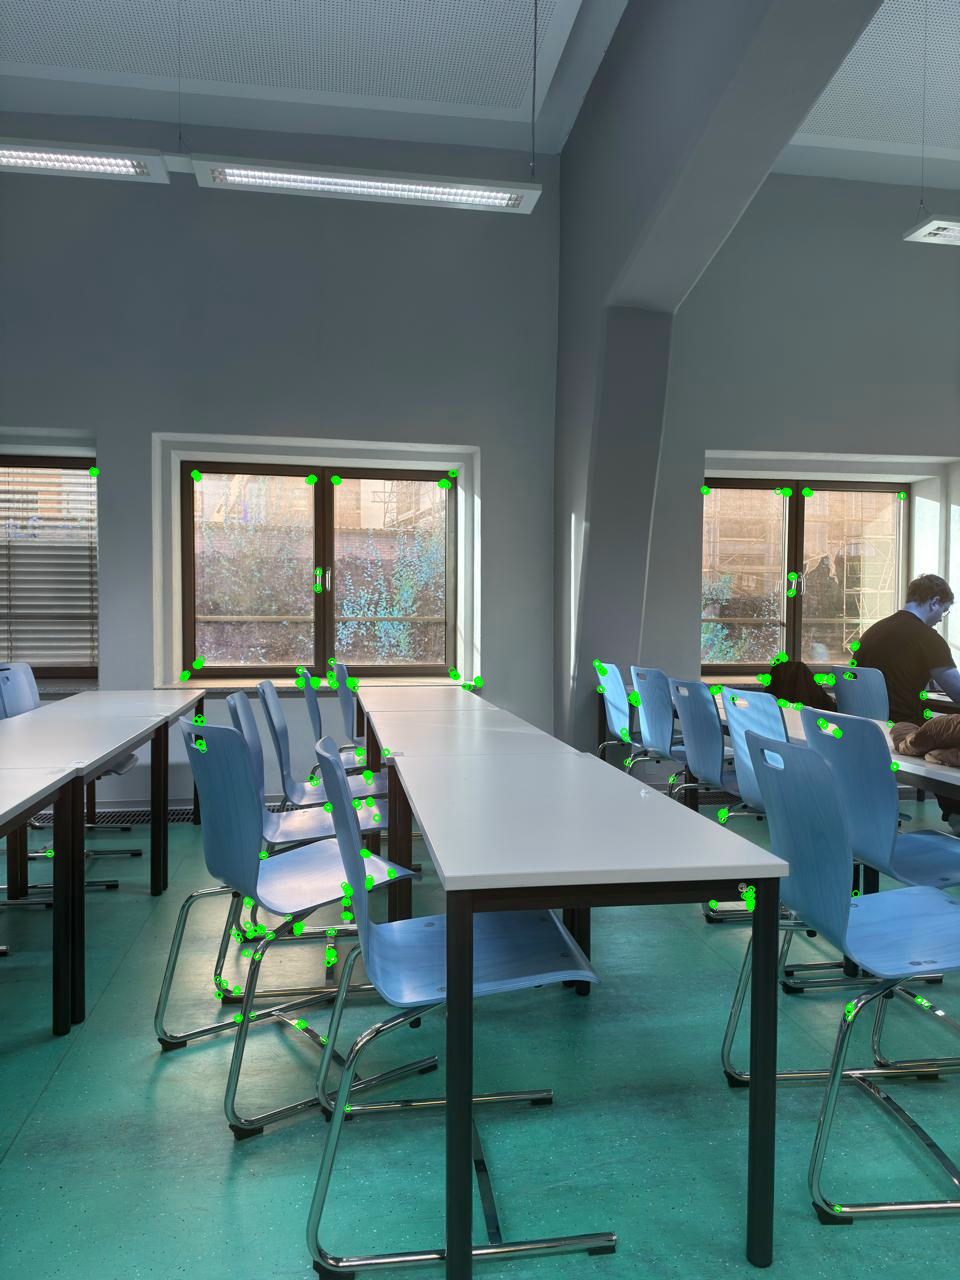

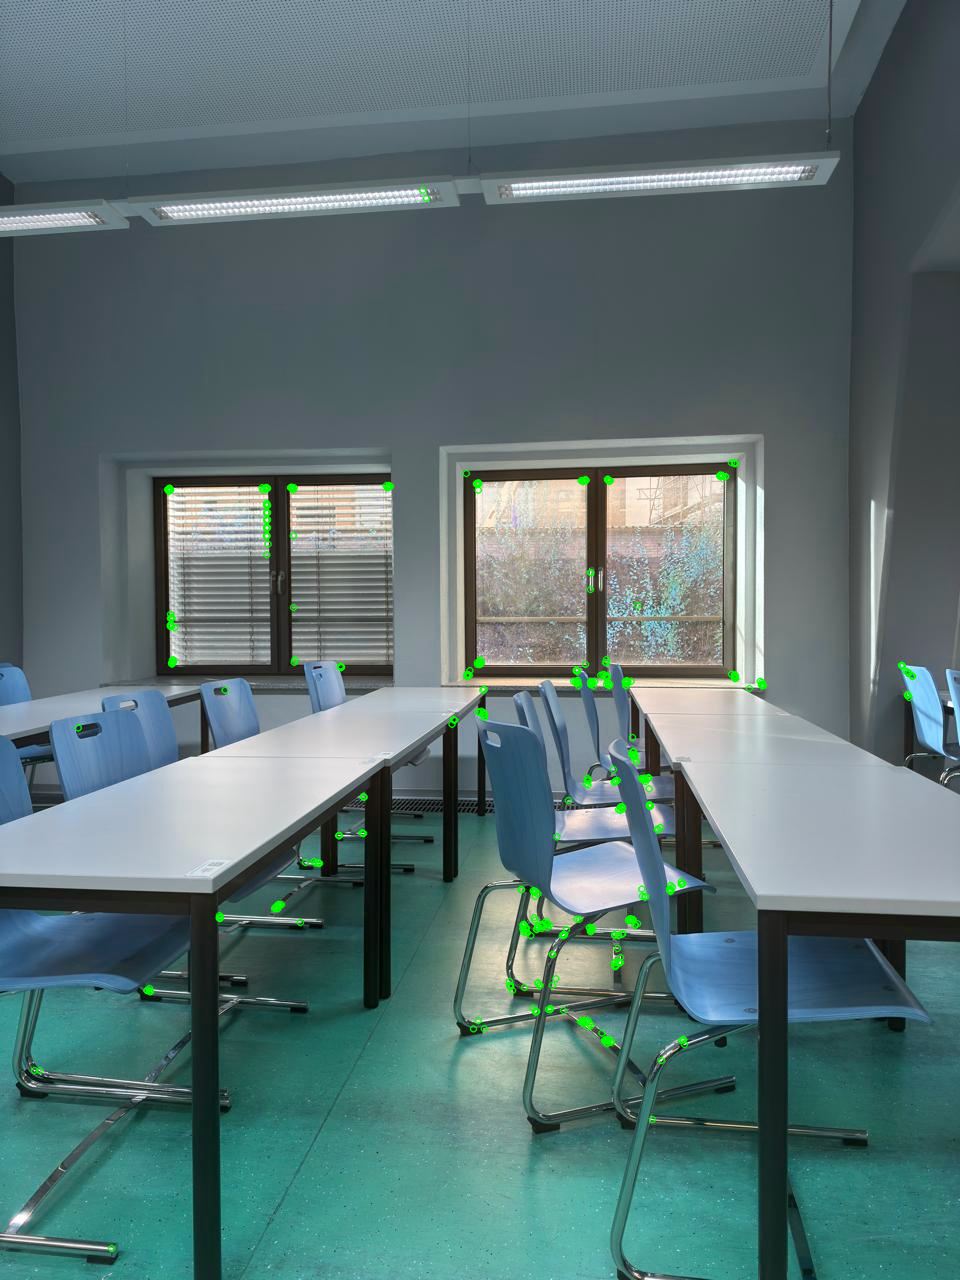

In [ ]:
from google.colab.patches import cv2_imshow

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Draw the keypoints
image1_keypoints = cv2.drawKeypoints(image1, keypoints1, None, color=(0,255,0), flags=0)
image2_keypoints = cv2.drawKeypoints(image2, keypoints2, None, color=(0,255,0), flags=0)

# Show them
cv2_imshow(image1_keypoints)
cv2_imshow(image2_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)


In [ ]:
# Create a Brute-Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between images
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)



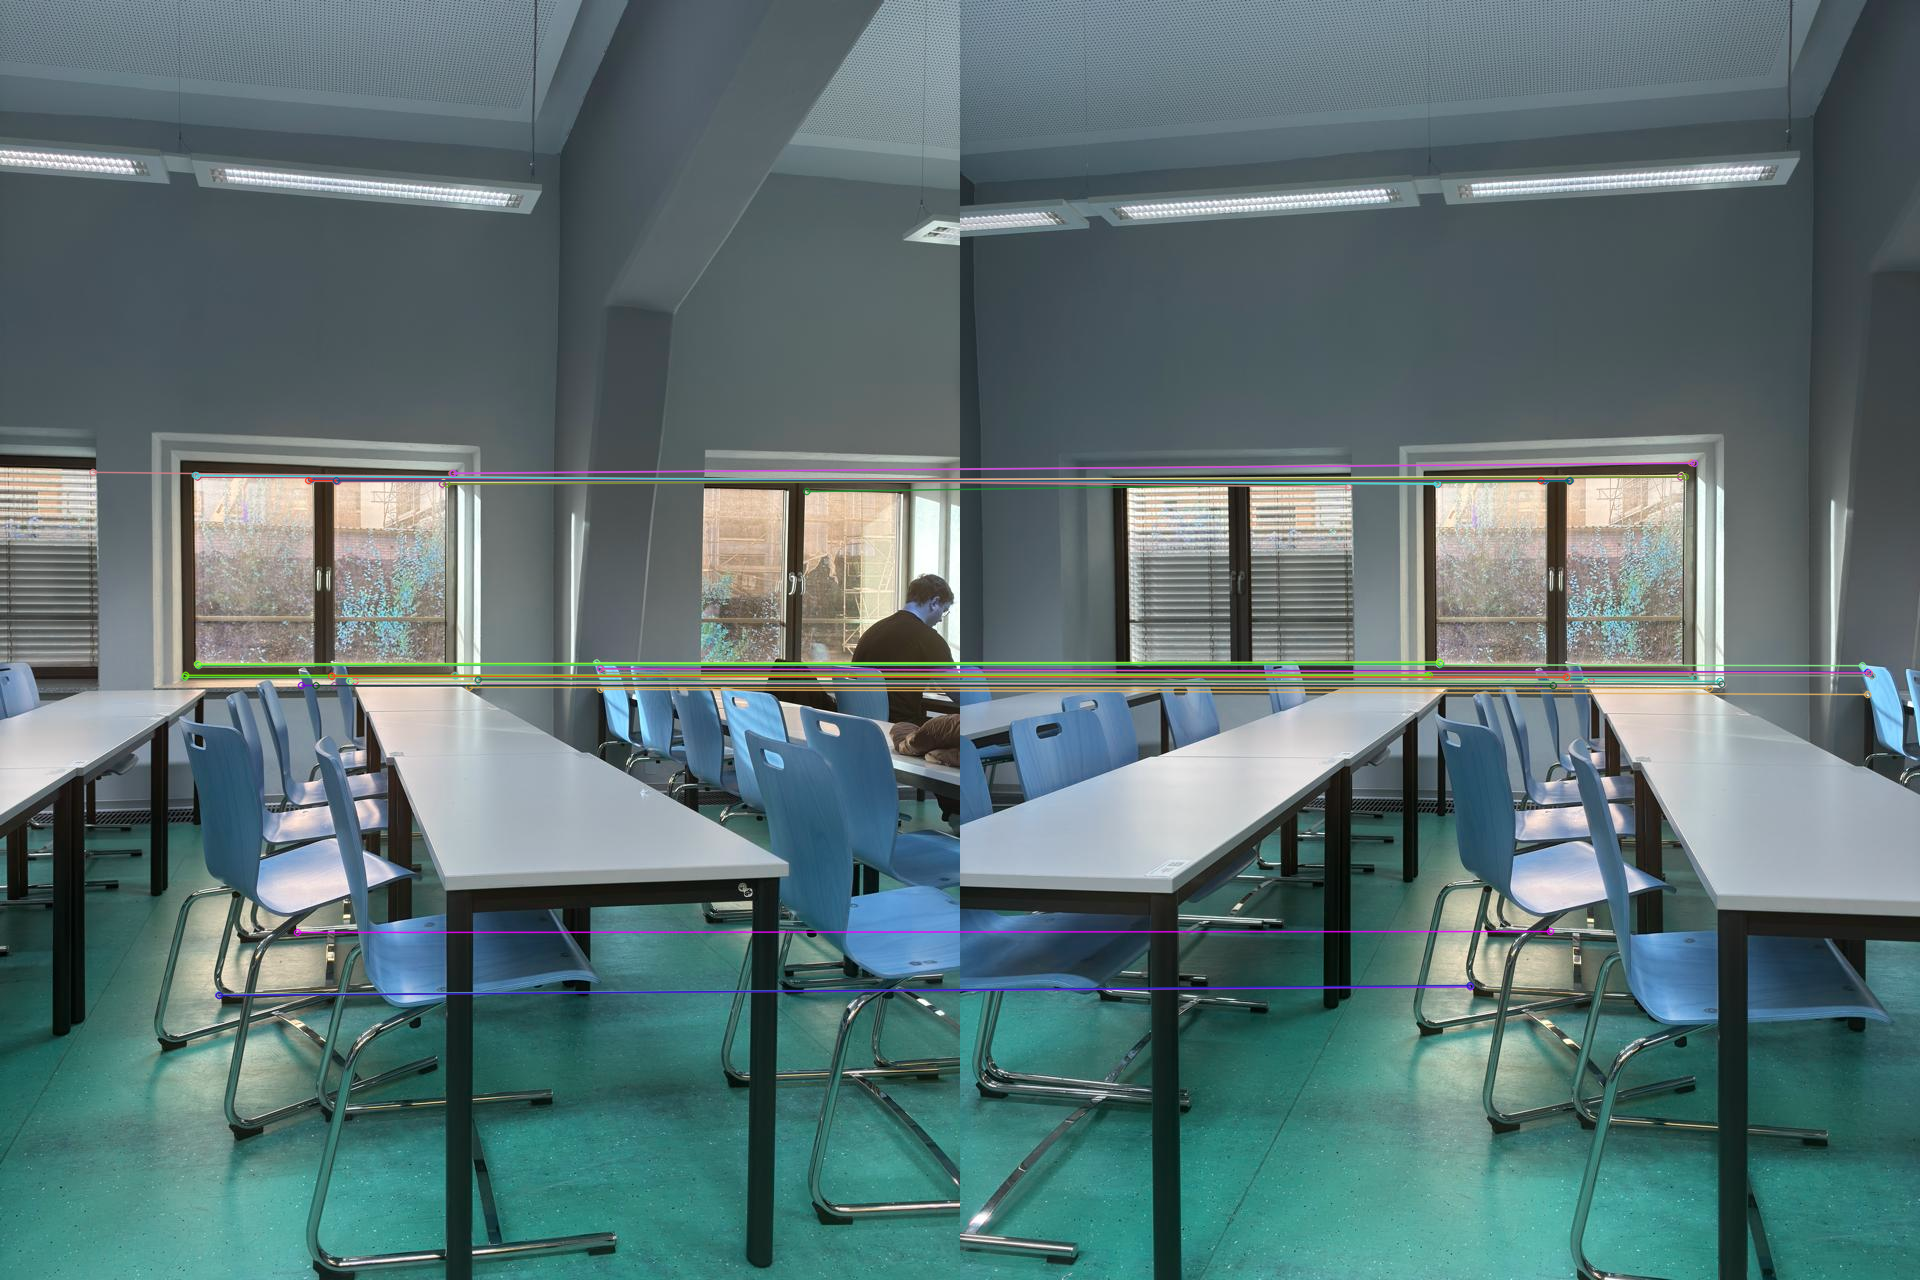

In [ ]:
match_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=2)
cv2_imshow(match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Extract matched keypoints
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

# Compute Homography using RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


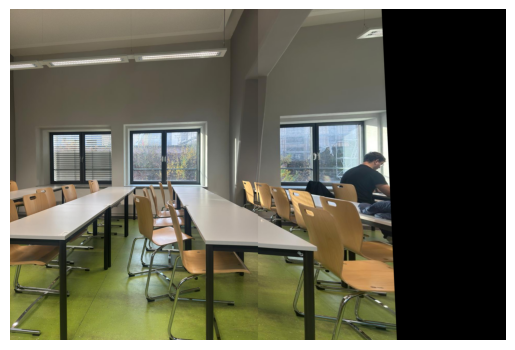

In [ ]:
height, width, _ = image2.shape
result = cv2.warpPerspective(image1, H, (width + image1.shape[1], height))
result[0:height, 0:width] = image2
plt.imshow(result)
plt.axis('off')
plt.show()
